# Neural Networks

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

$$
   f:\mathbb R \to \mathbb R, \ y = 2x^2 - \frac{1}{3}x^3
$$

In [8]:
def f(x):
    return 2 * x ** 2- x ** 3 / 3

x = np.linspace(-2, 4, 25)
x

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
        2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ])

In [9]:
y = f(x)
y

array([10.66666667,  7.91145833,  5.625     ,  3.77604167,  2.33333333,
        1.265625  ,  0.54166667,  0.13020833,  0.        ,  0.11979167,
        0.45833333,  0.984375  ,  1.66666667,  2.47395833,  3.375     ,
        4.33854167,  5.33333333,  6.328125  ,  7.29166667,  8.19270833,
        9.        ,  9.68229167, 10.20833333, 10.546875  , 10.66666667])

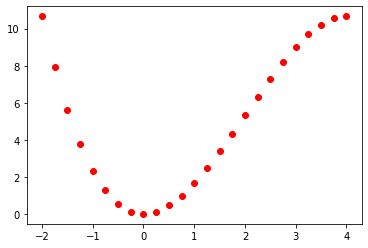

In [10]:

plt.plot(x, y, 'ro')

```{math}
    f:\mathbb R \to \mathbb R, \ y = \alpha + \beta * x
```

In [12]:
beta = np.cov(x, y, ddof=0)[0,1] / np.var(x)
beta

1.0541666666666667

In [15]:
alpha = y.mean() - beta * x.mean()
alpha

3.8625000000000003

In [17]:
y_ = alpha + beta * x
MSE = ((y - y_) ** 2).mean()
MSE

10.721953125

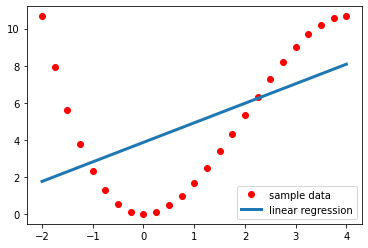

In [18]:
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='linear regression')
plt.legend()